In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('listings-san-jose.csv')
df.columns
df.shape

(510, 268)

In [63]:
df1 = pd.read_csv('listings.csv')
df1.columns
df1.shape

(637, 300)

In [64]:
df2 = pd.read_csv('listings-vallejo-and-around.csv')
df2.columns
df2.shape

(500, 295)

<Figure size 5000x5000 with 0 Axes>

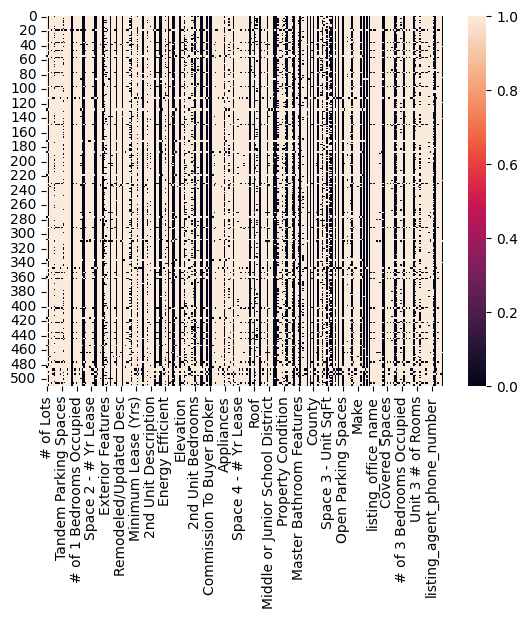

<Figure size 5000x5000 with 0 Axes>

In [65]:
import seaborn as sns
sns.heatmap(df.isna())

plt.figure(figsize=(50,50))

In [66]:
df.head()

,# of Lots,Parking Fee $,Berth Size Width,Unit 4 Approx SqFt,Industrial SqFt,Electric,2 Bedroom Annual Occupancy,# of 4 Bedrooms Occupied,Studio Annual Occupancy,# of Restrooms,...,Family Room Features,Road Surface Type,listing_agent_phone_number,Fireplace Features,property_description,Tenant Allow/Fixed,Total # Owner Occupied,2 Bedroom Rent Range,Loading,listing_detail_monthly_cost
0,NaN,0.0,NaN,NaN,NaN,220 Volts in Kitchen,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Gas Starter, Living Room",Welcome to an extraordinary living experience ...,NaN,NaN,NaN,NaN,"$15,025/month"
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,modern and updated home in the heart of Silico...,NaN,NaN,NaN,NaN,"$11,662/month"
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Affordable MOVE-IN ready TURN-KEY home in the ...,NaN,NaN,NaN,NaN,"$4,839/month"
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SUMMER SPECIAL - The Almaden is a beautiful ne...,NaN,NaN,NaN,NaN,"$6,595/month"
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Luxurious and highly desired Sandalwood Townho...,NaN,NaN,NaN,NaN,"$10,289/month"


In [67]:
def lowercase_column_names(column_names):
    return [col.lower() for col in column_names]
same_columns = []
should_drop = []
for i in lowercase_column_names(df.columns):
    for j in lowercase_column_names(df1.columns):
        if i==j:
            same_columns.append(i)

        
print(len(same_columns))


total_same_columns = []
for i in same_columns:
    for j in lowercase_column_names(df2.columns):
        if i==j:
            total_same_columns.append(i)


print(len(total_same_columns))

def find_duplicates(input_list):
    seen = set()
    duplicates = set()
    for item in input_list:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    return list(duplicates)

print(find_duplicates(total_same_columns))
print(find_duplicates(same_columns))

266
267
['# of buildings']
['# of buildings']


In [68]:
for i in df2.columns:
    print(i.lower())

find_duplicates(lowercase_column_names(df2.columns))

3 bedroom annual occupancy
4 bedroom annual occupancy
accessibility features
flooring
property condition
pool features
utilities
manufacturer
main level
kitchen features
unit/block/lot
business type
unit 3 type
3 bedroom rent range
unit 4 partial baths
total # owner occupied
covered spaces
horse property
# of lots
fencing
1 bedroom annual occupancy
tenant pays
tenant allow/fixed
park/marina address
second parcel number
electric
property subtype
garage spaces
unit 4 description
# of tenants
space 1 - unit sqft
listing_detail_price
minimum bldg sqft
distance to gas
space 4 - unit sqft
lease deposit
fireplace features
master bedroom features
property_description
unit 4 lease term
appliances
berth size length
tenant allow/sqft
studio rent range
remodeled/updated desc
association fee
association fee frequency
2nd unit occupied
# of guest space(s)
space 2 - unit sqft
percent office
unit 1 full baths
parking ratio
space 3 - $ / sqft
highlights_text
owner pays
2nd unit full baths
zoning
cross 

['# of buildings']

In [69]:
filtered_df = df[df['listing_detail_label'].notna()]

In [70]:
len(filtered_df)

510

In [71]:
for i in df.columns:
    print(f"number of entries in the {i} column: {len(df[i])}  \n Empty rows: {sum(df[i].isna())}")

number of entries in the # of Lots column: 510  
 Empty rows: 483
number of entries in the Parking Fee $ column: 510  
 Empty rows: 75
number of entries in the Berth Size Width column: 510  
 Empty rows: 502
number of entries in the Unit 4 Approx SqFt column: 510  
 Empty rows: 481
number of entries in the Industrial SqFt column: 510  
 Empty rows: 499
number of entries in the Electric column: 510  
 Empty rows: 409
number of entries in the 2 Bedroom Annual Occupancy column: 510  
 Empty rows: 481
number of entries in the # of 4 Bedrooms Occupied column: 510  
 Empty rows: 481
number of entries in the Studio Annual Occupancy column: 510  
 Empty rows: 481
number of entries in the # of Restrooms column: 510  
 Empty rows: 499
number of entries in the Tandem Parking Spaces column: 510  
 Empty rows: 481
number of entries in the Pool Features column: 510  
 Empty rows: 390
number of entries in the Unit 1 Type column: 510  
 Empty rows: 502
number of entries in the Unit 2 Occupancy column:

In [72]:
drop = []
for i in df.columns:
    if sum(df[i].isna())>= 500:
        print(f"dropped {i}")
        drop.append(i)
        df.drop(i, axis = 1)
print(f'the number of columns dropped: {len(drop)}')

dropped Berth Size Width
dropped Unit 1 Type
dropped Unit 2 Occupancy
dropped Model
dropped 4 Bedroom Rent Range
dropped 3 Bedroom Rent Range
dropped Distance to Public Transportation
dropped Crops
dropped Rent Includes
dropped Second Parcel Number
dropped Berth Size Length
dropped Park/Marina Address
dropped Current Space Rent
dropped Remodeled/Updated Desc
dropped Listing Co Agent Full Name
dropped Soil
dropped Year Built Source
dropped Width
dropped Property Faces
dropped Units Furnished
dropped Park/Board Approval Req
dropped Unit 3 Description
dropped Length
dropped Land Lease
dropped Unit 3 Occupancy
dropped Unit 1 Occupancy
dropped Bedrooms
dropped Walls
dropped Building Name
dropped Height Limit
dropped listing_agent_name
dropped Manufacturer
dropped Distance To Shopping
dropped Vegetation
dropped 1 Bedroom Rent Range
dropped Parking Type
dropped Construction Materials
dropped Topography
dropped Skirt
dropped Make
dropped Horse Property Features
dropped Body Type
dropped listin

In [73]:
def drop_columns_with_missing_values(df, threshold):
    drop = []
    for col in df.columns:
        if df[col].isna().sum() >= threshold:
            print(f"Dropped {col}")
            drop.append(col)
    print(f'The number of columns dropped: {len(drop)}\n\n\n\n')
    return df, len(drop)


drop_columns_with_missing_values(df, 500)
drop_columns_with_missing_values(df2, 500)
drop_columns_with_missing_values(df1, 500)

Dropped Berth Size Width
Dropped Unit 1 Type
Dropped Unit 2 Occupancy
Dropped Model
Dropped 4 Bedroom Rent Range
Dropped 3 Bedroom Rent Range
Dropped Distance to Public Transportation
Dropped Crops
Dropped Rent Includes
Dropped Second Parcel Number
Dropped Berth Size Length
Dropped Park/Marina Address
Dropped Current Space Rent
Dropped Remodeled/Updated Desc
Dropped Listing Co Agent Full Name
Dropped Soil
Dropped Year Built Source
Dropped Width
Dropped Property Faces
Dropped Units Furnished
Dropped Park/Board Approval Req
Dropped Unit 3 Description
Dropped Length
Dropped Land Lease
Dropped Unit 3 Occupancy
Dropped Unit 1 Occupancy
Dropped Bedrooms
Dropped Walls
Dropped Building Name
Dropped Height Limit
Dropped listing_agent_name
Dropped Manufacturer
Dropped Distance To Shopping
Dropped Vegetation
Dropped 1 Bedroom Rent Range
Dropped Parking Type
Dropped Construction Materials
Dropped Topography
Dropped Skirt
Dropped Make
Dropped Horse Property Features
Dropped Body Type
Dropped listin

(     Unit 3 Rent Listing Co Agent Full Name Location Patio And Porch Features  \
 0         3200.0                        NaN      NaN                      NaN   
 1         3200.0                        NaN      NaN                      NaN   
 2            NaN                        NaN      NaN                      NaN   
 3            NaN                        NaN      NaN                  Deck(s)   
 4            NaN                        NaN      NaN                      NaN   
 ..           ...                        ...      ...                      ...   
 632          NaN                        NaN      NaN          Uncovered Patio   
 633          NaN                        NaN      NaN          Uncovered Patio   
 634          NaN                        NaN      NaN                      NaN   
 635          NaN                        NaN      NaN          Uncovered Patio   
 636          NaN                        NaN      NaN          Uncovered Patio   
 
     Vegetatio